# Part 0a: Importing Packages

In [1]:
import requests # getting info from API
import json # type of data we're working with from requests
import pandas as pd # sorting the data values
import matplotlib.pyplot as plt

# Part 0b: Past Information

We investigated some of Riot Games' API last week in our course, so we'll take some of that information such as the accountId as that will help us find what WE need to work on.

In [2]:
# Returning the accountId of a user using the summonerName and API Key supplied.
# Inputs:
#   summonerName: Name within League of Legends, case and character sensitive
#   APIKey: API Key from Riot Games 
def accId(summonerName, APIKey):
    URL = "https://na1.api.riotgames.com/lol/summoner/v4/summoners/by-name/" + summonerName + "?api_key=" + APIKey
    response = requests.get(URL)
    r1 = response.json()
    return r1['accountId']

In [3]:
# Find the accountId to get all of the matches from the summoner.
summonerName = (str)(input('Type your Summoner Name here and DO NOT INCLUDE ANY SPACES: '))
APIKey = (str)(input('Copy and paste your API Key here: '))
summ_accId = accId(summonerName, APIKey)
URL = "https://na1.api.riotgames.com/lol/match/v4/matchlists/by-account/" + summ_accId + "?api_key=" + APIKey
response = requests.get(URL)
r1 = response.json()
r1 = r1['matches']

Type your Summoner Name here and DO NOT INCLUDE ANY SPACES: Phume
Copy and paste your API Key here: RGAPI-383382c5-6c92-4f6b-815a-78970840c25a


In [4]:
matches = []
champion = []
lane = []
for i in range(len(r1)):
    matches.append(r1[i]['gameId'])
    champion.append(r1[i]['champion'])
    lane.append(r1[i]['lane'])
vals = {'matchId': matches, 'champion': champion, 'lane': lane}
df = pd.DataFrame(vals)

In [5]:
df

,matchId,champion,lane
0,3350475946,40,BOTTOM
1,3350328006,89,MID
2,3347884882,412,BOTTOM
3,3347780257,26,JUNGLE
4,3346359552,64,MID
...,...,...,...
95,2970795879,44,BOTTOM
96,2970781214,44,BOTTOM
97,2970736804,201,BOTTOM
98,2970715287,44,BOTTOM


In [ ]:
file_path=r'matches.xlsx'
stats=pd.ExcelWriter(file_path)
df.to_excel(stats)
stats.save()
stats.close()

# Part 1: Question
What are we investigating: Why are we winning/losing games and how do we improve?

First, we'll investigate some data and what we can pull. \
1) We're looking at game data so let's look at that information. \
2) Focus on only one and then look to scale. \
3) Take things in small steps and focus on one task at a time.

In [12]:
gameId = "3225011906"
URL_mch = "https://na1.api.riotgames.com/lol/match/v4/matches/" + gameId + "?api_key=" + APIKey
response = requests.get(URL_mch)
r1 = response.json()
r1 = r1['participants']
r1

[{'participantId': 1,
  'teamId': 100,
  'championId': 83,
  'spell1Id': 12,
  'spell2Id': 4,
  'stats': {'participantId': 1,
   'win': True,
   'item0': 2033,
   'item1': 3111,
   'item2': 3078,
   'item3': 3065,
   'item4': 3053,
   'item5': 1057,
   'item6': 3340,
   'kills': 8,
   'deaths': 1,
   'assists': 6,
   'largestKillingSpree': 6,
   'largestMultiKill': 3,
   'killingSprees': 2,
   'longestTimeSpentLiving': 1253,
   'doubleKills': 2,
   'tripleKills': 1,
   'quadraKills': 0,
   'pentaKills': 0,
   'unrealKills': 0,
   'totalDamageDealt': 216093,
   'magicDamageDealt': 42576,
   'physicalDamageDealt': 164016,
   'trueDamageDealt': 9501,
   'largestCriticalStrike': 0,
   'totalDamageDealtToChampions': 16920,
   'magicDamageDealtToChampions': 5044,
   'physicalDamageDealtToChampions': 11666,
   'trueDamageDealtToChampions': 209,
   'totalHeal': 7748,
   'totalUnitsHealed': 1,
   'damageSelfMitigated': 19181,
   'damageDealtToObjectives': 31913,
   'damageDealtToTurrets': 19316

In [13]:
for i in range(len(r1)):
    for keys in r1[i]['timeline'].keys():
        print(f"{keys}: {r1[i]['timeline'][keys]}")
    print("\n")

participantId: 1
creepsPerMinDeltas: {'10-20': 8.7, '0-10': 6.6, '20-30': 4.9}
xpPerMinDeltas: {'10-20': 619.3, '0-10': 443.5, '20-30': 595.5999999999999}
goldPerMinDeltas: {'10-20': 536.7, '0-10': 254, '20-30': 569}
csDiffPerMinDeltas: {'10-20': 1.9, '0-10': -1, '20-30': -2.0000000000000004}
xpDiffPerMinDeltas: {'10-20': 79.10000000000002, '0-10': -11.700000000000017, '20-30': -3.1000000000000227}
damageTakenPerMinDeltas: {'10-20': 737.0999999999999, '0-10': 329.1, '20-30': 1277}
damageTakenDiffPerMinDeltas: {'10-20': -103.29999999999998, '0-10': 78.6, '20-30': 665.8}
role: SOLO
lane: TOP


participantId: 2
creepsPerMinDeltas: {'10-20': 0.2, '0-10': 0, '20-30': 1.6}
xpPerMinDeltas: {'10-20': 358.1, '0-10': 246.4, '20-30': 436.6}
goldPerMinDeltas: {'10-20': 269.9, '0-10': 244.7, '20-30': 352.3}
csDiffPerMinDeltas: {'10-20': -2.2, '0-10': -0.5, '20-30': -0.9999999999999999}
xpDiffPerMinDeltas: {'10-20': -87.09999999999997, '0-10': -204.29999999999998, '20-30': 21.5}
damageTakenPerMinDel

In [15]:
# Want to have participant id, gold per minute deltas, role

print(r1[0]['timeline']['participantId'])
print(r1[0]['timeline']['goldPerMinDeltas']['0-10'])
print(r1[0]['timeline']['goldPerMinDeltas']['10-20'])
print(r1[0]['timeline']['goldPerMinDeltas']['20-30'])
    

1
254
536.7
569


In [11]:
r1[i]['timeline'].keys()

dict_keys(['participantId', 'creepsPerMinDeltas', 'xpPerMinDeltas', 'goldPerMinDeltas', 'csDiffPerMinDeltas', 'xpDiffPerMinDeltas', 'damageTakenPerMinDeltas', 'damageTakenDiffPerMinDeltas', 'role', 'lane'])

In [16]:
pd.DataFrame([[536.7, 254, 569], [536.7, 254, 569], [536.7, 254, 569]])

,0,1,2
0,536.7,254,569
1,536.7,254,569
2,536.7,254,569


In [26]:
lists = []
lists.append(r1[0]['timeline']['participantId'])
for key in r1[0]['timeline']['goldPerMinDeltas'].keys():
    print(key, end=": ")
    # lists.append(r1[0]['timeline']['goldPerMinDeltas'][key])
listval = [lists]
pd.DataFrame(listval)

10-20: 0-10: 20-30: 

,0
0,1


In [28]:
fullStack = []
for i in range(len(r1[i]['timeline'])):
    # make individual lists for each person
    lists = []
    lists.append(r1[i]['timeline']['participantId'])
    lists.append(r1[i]['timeline']['role'])
    lists.append(r1[i]['timeline']['lane'])
    for key in r1[i]['timeline']['goldPerMinDeltas'].keys():
        lists.append(r1[i]['timeline']['goldPerMinDeltas'][key])
    # append the list to the main lists to make dataFrame
    fullStack.append(lists)
# make into a dataFrame
labels = ['id', 'role', 'lane', '10-20', '0-10', '20-30']
x = pd.DataFrame(fullStack, columns=labels)
x = x.set_index('id')
x.head()

,role,lane,10-20,0-10,20-30
id,,,,,
1,SOLO,TOP,536.7,254.0,569.0
2,NONE,JUNGLE,269.9,244.7,352.3
3,SOLO,MIDDLE,587.3,370.7,473.0
4,DUO_SUPPORT,BOTTOM,235.7,139.8,280.6
5,DUO_CARRY,BOTTOM,430.1,244.7,461.6


In [21]:
plotting = x[['0-10', '10-20', '20-30']]
plotting

,0-10,10-20,20-30
id,,,
1,254.0,536.7,569.0
2,244.7,269.9,352.3
3,370.7,587.3,473.0
4,139.8,235.7,280.6
5,244.7,430.1,461.6
6,261.2,322.6,276.4
7,461.3,432.9,444.4
8,271.0,428.8,522.5
9,250.9,381.1,279.1


In [22]:
plotting = plotting.T
plotting

id,1,2,3,4,5,6,7,8,9,10
0-10,254.0,244.7,370.7,139.8,244.7,261.2,461.3,271.0,250.9,159.2
10-20,536.7,269.9,587.3,235.7,430.1,322.6,432.9,428.8,381.1,280.1
20-30,569.0,352.3,473.0,280.6,461.6,276.4,444.4,522.5,279.1,189.7


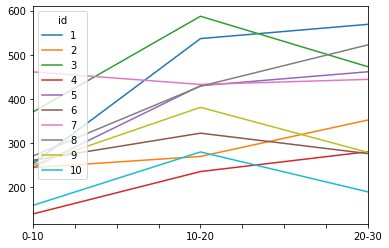

In [23]:
plotting.plot()

# What can we conlude from this?
Overall many people decreased from gold per minute deltas, but we see that id number 7 was the only person who didn't decrease in between the game. What did he do to make sure his change in gold per minute was always staying consistent? We can then look at this further and continue investigating to improve our own gameplay.

Without looking at the game, you can already tell that the jungler was a huge factor in keeping their team in the game.